<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />

# Worksheet 1.2:  Exploring One Dimensional Data - Answers
This worksheet covers concepts covered in the first half of Module 1 - Exploratory Data Analysis in One Dimension.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

There are many ways to accomplish the tasks that you are presented with, however you will find that by using the techniques covered in class, the exercises should be relatively simple. 

## Import the Libraries
For this exercise, we will be using:
* Pandas (http://pandas.pydata.org/pandas-docs/stable/)
* Numpy (https://docs.scipy.org/doc/numpy/reference/)

In [1]:
import pandas as pd
import numpy as np

## Exercise 1: Summarize the Data
For this exercise, you are given a Series of random numbers creatively named `random_numbers`.  For the first exercise please do the following:

1.  Remove all the numbers less than 10
2.  Sort the series
3.  Calculate the Tukey 5 number summary for this dataset
4.  Count the number of even and odd numbers
5.  Find the five largest and 5 smallest numbers in the series

In [2]:
#Generate a series of random numbers between 1 and 100. 
random_numbers = pd.Series( np.random.randint(1, 100, 50) )

In [3]:
#Filter the Series
random_numbers_filtered = random_numbers[random_numbers >= 10]

#Sort the Series
random_numbers_filtered.sort_values(inplace=True)

#Calculate the Tukey 5 Number Summary
random_numbers_filtered.describe()

#Count the number of even and odd numbers
even_numbers = random_numbers_filtered[random_numbers_filtered % 2 == 0].count() 
odd_numbers = random_numbers_filtered[random_numbers_filtered % 2 != 0].count() 
print( "Even numbers: " + str(even_numbers))
print( "Odd numbers: " + str(odd_numbers))

#Find the five largest and smallest numbers
print( "Smallest Numbers:")
print( random_numbers_filtered.head(5))

print( "Largest Numbers:")
print( random_numbers_filtered.tail(5))

Even numbers: 20
Odd numbers: 27
Smallest Numbers:
22    11
17    11
19    14
40    15
12    15
dtype: int64
Largest Numbers:
1     89
44    91
25    93
42    97
32    99
dtype: int64


In [4]:
random_numbers_filtered.describe()

count    47.000000
mean     55.553191
std      27.067395
min      11.000000
25%      31.500000
50%      57.000000
75%      79.500000
max      99.000000
dtype: float64

## Exercise 2: 
Create a histogram plot (bar graph) of the random number series you created above (use 8 bins).

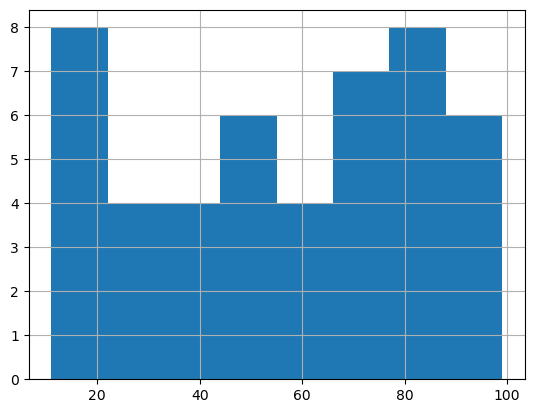

In [5]:
random_numbers_filtered.hist(bins=8);

## Exercise 3:
You have been given a list of US phone numbers.  The area code is the first three digits.  Your task is to produce a summary of how many times each area code appears in the list. To do this you will need to:
1. Extract the area code from each phone number
2. Count the unique occurances.

In [6]:
phone_numbers = [
'(833) 759-6854',
'(811) 268-9951',
'(855) 449-4648',
'(833) 212-2929',
'(833) 893-7475',
'(822) 346-3086',
'(844) 259-9074',
'(855) 975-8945',
'(811) 385-8515',
'(811) 523-5090',
'(844) 593-5677',
'(833) 534-5793',
'(899) 898-3043',
'(833) 662-7621',
'(899) 146-8244',
'(822) 793-4965',
'(822) 641-7853',
'(833) 153-7848',
'(811) 958-2930',
'(822) 332-3070',
'(833) 223-1776',
'(811) 397-1451',
'(844) 096-0377',
'(822) 000-0717',
'(899) 311-1880']

In [7]:
phone_number_series = pd.Series(phone_numbers)

## There are many methods that can solve this, below are only 3 of them. You may have used something else which is great as long as you get the right answers. 

### Method 1 
- Extract the 1,2,3rd characters from the string using the slice method

In [8]:
area_codes = phone_number_series.str.slice(1,4)
area_codes.value_counts()

833    7
811    5
822    5
844    3
899    3
855    2
Name: count, dtype: int64

### Method 2 
- extract the first three digits using the extract method and string formatting

In [9]:
area_codes2 = phone_number_series.str.extract( '\((\d{3})\)', expand=False)
area_codes2.value_counts()

833    7
811    5
822    5
844    3
899    3
855    2
Name: count, dtype: int64

### Method 3
- Split the string on the right parens
- extract the 0th item from that list
- replace the left parens with nothing

In [10]:
area_codes3 = phone_number_series.str.split(')').str[0].str.replace('(','')
area_codes3.value_counts()

833    7
811    5
822    5
844    3
899    3
855    2
Name: count, dtype: int64

In [11]:
area_codes.describe()

count      25
unique      6
top       833
freq        7
dtype: object